In [1]:
import pandas as pd

In [4]:
filename = "data/Insurance.csv"
df = pd.read_csv(filename)

print(df.head())
print(df.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [5]:
df.shape
# (rows, cols)

(1338, 7)

In [6]:
df.sort_values(by="bmi", ascending=False) # descending order 

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.130,0,no,southeast,1163.46270
1047,22,male,52.580,1,yes,southeast,44501.39820
847,23,male,50.380,1,no,southeast,2438.05520
116,58,male,49.060,0,no,southeast,11381.32540
286,46,female,48.070,2,no,northeast,9432.92530
...,...,...,...,...,...,...,...
1286,28,female,17.290,0,no,northeast,3732.62510
412,26,female,17.195,2,yes,northeast,14455.64405
1226,38,male,16.815,2,no,northeast,6640.54485
428,21,female,16.815,1,no,northeast,3167.45585


In [13]:
# making a sub dataframe
sub_df = df[(df['sex']=='male') & (df['bmi']>31)]

print(sub_df.head())

    age   sex    bmi  children smoker     region     charges
1    18  male  33.77         1     no  southeast   1725.5523
2    28  male  33.00         3     no  southeast   4449.4620
12   23  male  34.40         0     no  southwest   1826.8430
14   27  male  42.13         0    yes  southeast  39611.7577
18   56  male  40.30         0     no  southwest  10602.3850


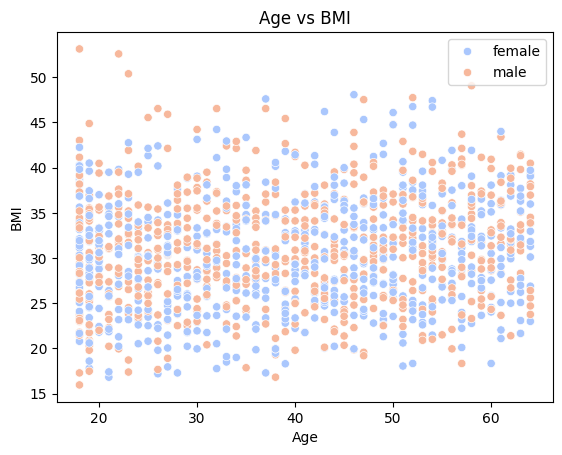

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns 

#Scatter plot
sns.scatterplot(
    x="age", 
    y="bmi", 
    hue='sex',
    data=df, 
    palette="coolwarm", 

)
plt.legend()
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

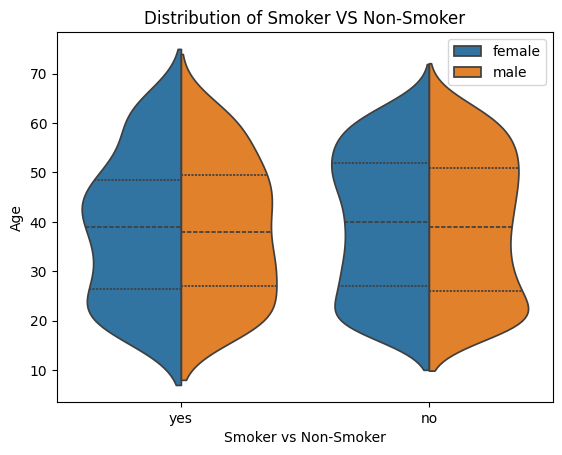

In [35]:
import seaborn as sns

sns.violinplot(
    x="smoker",           
    y="age",     
    hue="sex", 
    data=df,             
    split=True,          
    inner="quartile",       
    
)
plt.legend()
plt.title("Distribution of Smoker VS Non-Smoker")
plt.xlabel("Smoker vs Non-Smoker")
plt.ylabel("Age")
plt.show()

In [37]:
import statsmodels.formula.api as smf

model = smf.ols('charges ~ age', data=df).fit()
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.89e-29
Time:                        10:22:39   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.0

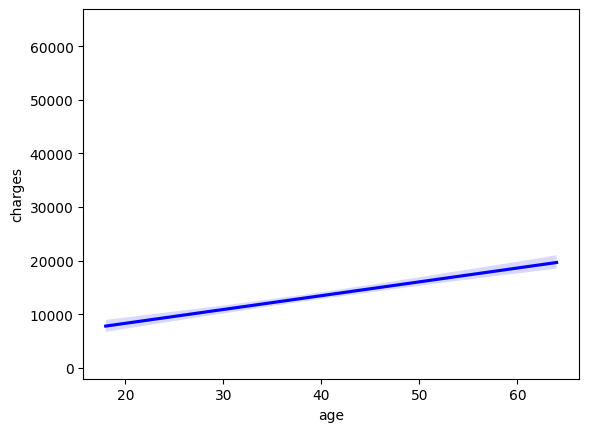

In [41]:

#regression plot
sns.regplot(
    x="age",
    y="charges",
    data=df,
    scatter_kws={'alpha':0}, # this adjust the transparency of scatter points
    line_kws={'color':'blue'} #customize the line color
)
plt.show()

In [60]:
non_smokers = df[df['smoker'] == 'no']
smokers = df[df['smoker'] == 'yes']

no = non_smokers.groupby('age')['charges'].mean()
yes = smokers.groupby('age')['charges'].mean()

print(no.head())
print(no.tail())
print("smokers")
print(yes.head())
print(yes.tail())

age
18    3215.162259
19    3536.712898
20    3673.112925
21    3813.530413
22    2551.017880
Name: charges, dtype: float64
age
60    14719.410804
61    16181.750438
62    15391.066944
63    14205.335706
64    15805.350545
Name: charges, dtype: float64
smokers
age
18    25473.730221
19    27001.232768
20    24574.330650
21    16650.605250
22    37373.287517
Name: charges, dtype: float64
age
60    48115.446238
61    38578.794592
62    37084.607312
63    40331.784380
64    39283.060036
Name: charges, dtype: float64


In [69]:
specials = 'data/CafeteriaSpecials.csv'
menu = 'data/CafeteriaMenu.csv'

#read
df_specials = pd.read_csv(specials)
df_menu = pd.read_csv(menu)

# print(df_menu)
# print(df_specials)

#merged
merged_inner = pd.merge(df_specials,df_menu,on='Special')
# print(merged_inner)

#sort merged data frame by day
sorted = merged_inner.sort_values(by="Day")
del sorted['Special']

print(sorted)
 

       Entre  Price  Day
0    Burgers   4.50    1
2      Tacos   3.75    2
4       Spam   1.25    3
6  Meatballs   4.00    4
8      Pizza   4.25    5
1    Burgers   4.50    6
3      Tacos   3.75    7
5       Spam   1.25    8
7  Meatballs   4.00    9
9      Pizza   4.25   10
